# Alcohol consumption per capita

In [1]:
import pandas as pd

import sys
from pathlib import Path
# Add the parent directory to the sys.path (without this we cannot import constants or scripts)
sys.path.insert(0, str(Path.cwd().parent))
from constants.countries import highincome_countries
from src import generate_high_income_global_avg_index
from src.plotting import plot_value_per_year_GER_HIC_GLO

%load_ext autoreload

## Load data

In [2]:
DATA_PATH = "../data/final/"
OUTPUT_PATH = "output/"
alcohol_data_path = DATA_PATH + "wdi_AlcoholConsumption.csv"
VALUE_COLUMN_NAME = "Value"
YEAR_COLUMN_NAME = "Year"

In [3]:
alco_tobacco_df = pd.read_csv(alcohol_data_path)
alco_tobacco_df

,Country Name,Country Code,Series Name,Year,Value
0,Afghanistan,AFG,Total alcohol consumption per capita (liters o...,2000,0.00277
1,Albania,ALB,Total alcohol consumption per capita (liters o...,2000,4.43100
2,Algeria,DZA,Total alcohol consumption per capita (liters o...,2000,0.30323
3,Andorra,AND,Total alcohol consumption per capita (liters o...,2000,12.54881
4,Angola,AGO,Total alcohol consumption per capita (liters o...,2000,5.18632
...,...,...,...,...,...
926,"Venezuela, RB",VEN,Total alcohol consumption per capita (liters o...,2019,3.01625
927,Viet Nam,VNM,Total alcohol consumption per capita (liters o...,2019,9.33984
928,"Yemen, Rep.",YEM,Total alcohol consumption per capita (liters o...,2019,0.02778
929,Zambia,ZMB,Total alcohol consumption per capita (liters o...,2019,3.85176


## Add 'Global' average and 'High-income countries' average

In [4]:
# Appending the average data to the original DataFrame
alcohol_df_wrld = generate_high_income_global_avg_index(alco_tobacco_df)

# Display the last few rows to verify the appended averages
alcohol_df_wrld

,Country Name,Country Code,Series Name,Year,Value
0,Afghanistan,AFG,Total alcohol consumption per capita (liters o...,2000,0.002770
1,Albania,ALB,Total alcohol consumption per capita (liters o...,2000,4.431000
2,Algeria,DZA,Total alcohol consumption per capita (liters o...,2000,0.303230
3,Andorra,AND,Total alcohol consumption per capita (liters o...,2000,12.548810
4,Angola,AGO,Total alcohol consumption per capita (liters o...,2000,5.186320
...,...,...,...,...,...
0,Global,GLB,NaN,2000,5.424797
1,Global,GLB,NaN,2005,5.533195
2,Global,GLB,NaN,2010,5.558328
3,Global,GLB,NaN,2015,5.488749


## Plot the result

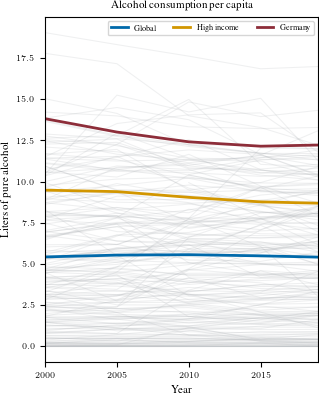

In [5]:
%autoreload 2

plot_value_per_year_GER_HIC_GLO(
    alcohol_df_wrld, 
    xticks = 5, 
    output_fig_path = OUTPUT_PATH + "fig_AlcoholConsumptionPerCapita.pdf",
    xlabel = 'Year',
    ylabel = "Liters of pure alcohol",
    title = "Alcohol consumption per capita")